# Project 3: Liquor Sales + Linear Regression
## Grégory Vial
## October 30th, 2016

# Problem statement
The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year by store.

Ability to predict as precisely as possible future sales also gives the ability to understand what amount of taxes is expected to be collected. Prior to making any public policy change, one must be able to assess its impact, as it spans many stakeholders: consumers, producers, retailers, state department of finance, of heath, as well as various pro and anti alcohol lobbies.

In this report we will focus on financial impact of any policy change and leave it to the state tax department to make any decision on this basis.

# Goal
Based on historical data from 2015 and Q1 2016, predict what the liquor sales will be in each county of Iowa in 2016.


# Sucess criteria
We will consider our mission successful if we are able to extrapolate Q1 2016 sales to predict the whole 2016 sales based on a model with an accuracy of 80% (percentage of variance explained, or $R^2$)

# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

## Load the data into a DataFrame
df = pd.read_csv("Iowa_Liquor_Sales_reduced.csv")

## Look at the data
df.head(3)

/home/dsi-student/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77


In [3]:
# Check number of rows and columns
df.shape

(2709552, 18)

In [4]:
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"])

## Remove duplicated columns which information is contained in another field
df.drop(['City','County','Category Name','Item Description','Bottle Volume (ml)','Volume Sold (Gallons)'],axis=1,inplace=True)

## Remove fields we won't use for the analysis
df.drop(['Vendor Number','State Bottle Cost'],axis=1,inplace=True)

# Check how many missing values
df.apply(lambda x: sum(pd.isnull(x)))

Date                        0
Store Number                0
Zip Code                    0
County Number           10913
Category                  779
Item Number                 0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
dtype: int64

In [5]:
# Replace bad values
df["County Number"].fillna(0,inplace=True)
df["Category"].fillna(0,inplace=True)

# Convert to appropriate fields to integers
df['County Number'] = [int(x) for x in df['County Number']]
df['Category'] = [int(x) for x in df['Category']]

# Remove $ from certain columns
dollar_cols = ['State Bottle Retail','Sale (Dollars)']
for col in dollar_cols:
    try:
        df[col] = [float(x[1:]) for x in df[col]]
    except Exception:
        print("Cannot convert %s" % col)

In [6]:
df.head()

,Date,Store Number,Zip Code,County Number,Category,Item Number,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2016-03-31,5029,52806,82,1022100,87152,14.99,12,179.88,4.5
1,2016-03-31,5029,52806,82,1022100,89197,18.75,2,37.50,2.0
2,2016-03-31,4959,50613,7,1071100,63959,8.96,6,53.76,10.5
3,2016-03-31,2190,50314,77,1031200,40597,3.36,48,161.28,9.6
4,2016-03-31,5240,52358,0,1081200,73055,18.75,6,112.50,4.5


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

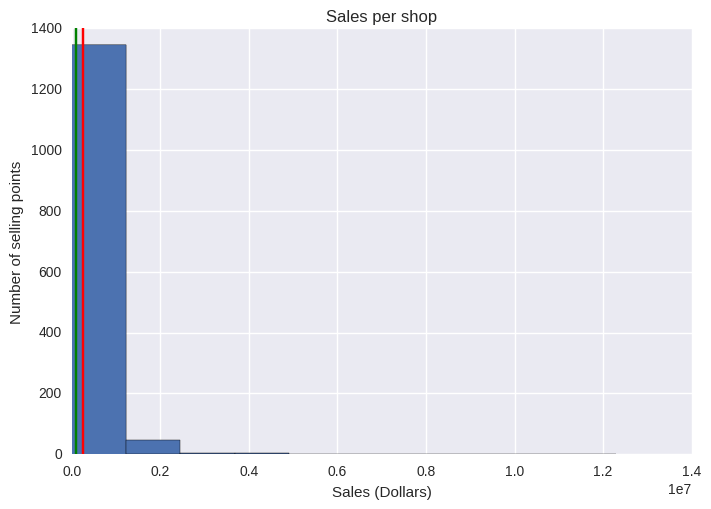

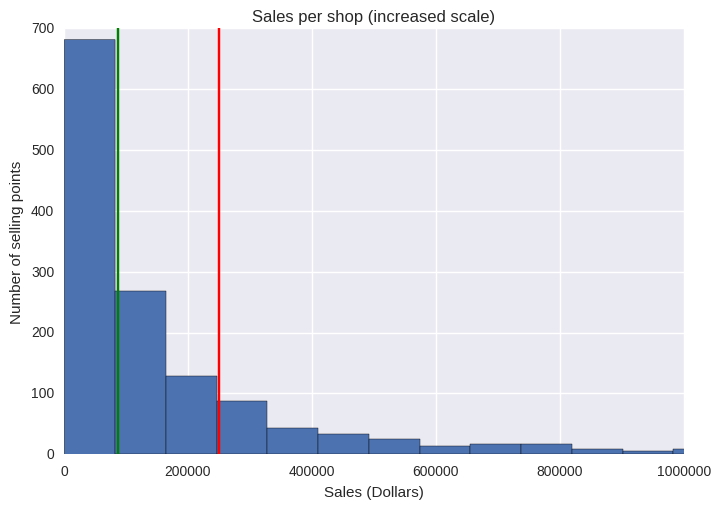

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_per_store = df.pivot_table(index='Store Number',values="Sale (Dollars)",aggfunc=np.sum)

plt.hist(sales_per_store)
plt.axvline(np.mean(sales_per_store),color="red")
plt.axvline(np.median(sales_per_store),color="green")
plt.xlabel("Sales (Dollars)")
plt.ylabel("Number of selling points")
plt.title("Sales per shop")
plt.show()

plt.hist(sales_per_store,bins=150)
plt.axvline(np.mean(sales_per_store),color="red")
plt.axvline(np.median(sales_per_store),color="green")
plt.xlim((0,1000000))
plt.xlabel("Sales (Dollars)")
plt.ylabel("Number of selling points")
plt.title("Sales per shop (increased scale)")
plt.show()

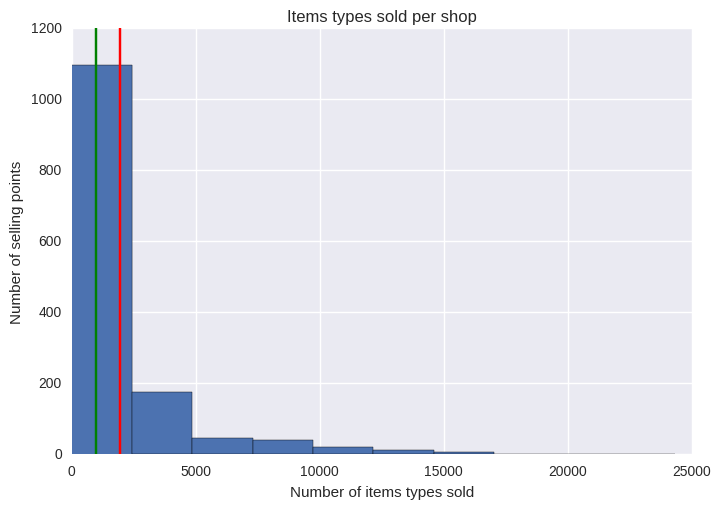

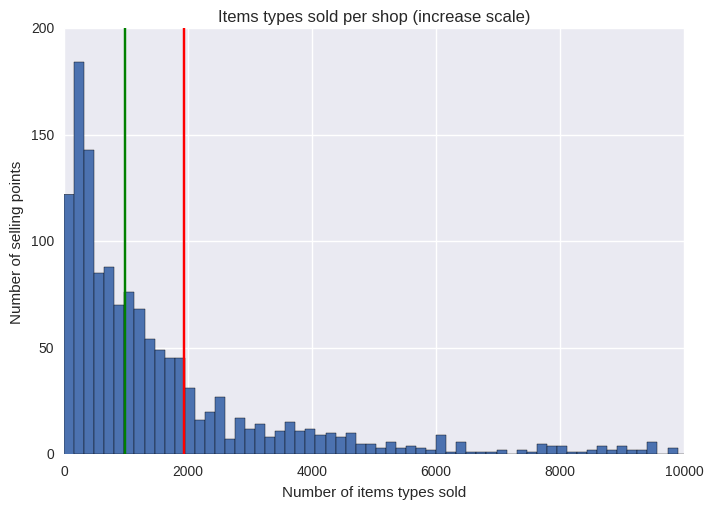

In [8]:
# Check how many items shops sell 

item_per_store = df.pivot_table(index='Store Number',values="Item Number",aggfunc=len)

plt.hist(item_per_store)
plt.axvline(np.mean(item_per_store),color="red")
plt.axvline(np.median(item_per_store),color="green")
plt.xlabel("Number of items types sold")
plt.ylabel("Number of selling points")
plt.title("Items types sold per shop")
plt.show()

plt.hist(item_per_store,bins=150)
plt.axvline(np.mean(item_per_store),color="red")
plt.axvline(np.median(item_per_store),color="green")
plt.xlim((0,10000))
plt.xlabel("Number of items types sold")
plt.ylabel("Number of selling points")
plt.title("Items types sold per shop (increase scale)")
plt.show()

## Record your findings

Initial analysis shows a huge disparity in the types of liquor stores, as the range from very small to extremly big.
Whilst the majority of store report sales over the studied period of less than 100,000 USD (median), some had turnover in excess of 12 million USD over the same period.
Simimarly, most shops sell less than 1000 types of products, but the biggest stores sell as many as 10,000 different references.

## Risks
There was a significant number of County and Category not filled in the data, and in order to proceed with analysis with have replaced missing values with 0. This will necessarily impact the study of sales per county, so it must be taken into account that report will contain a margin of error.

## Assumptions
The data includes all stores that did business over the period from Jan 2015 until end March 2016. If some of these businesses have closed before year end or open after the beginning of the year, they may impact our analysis. Our assumptions is that there is only a limited number of these shops and that fundamentaly they won't change the prediction quality. However when training the model we will ignore those shopw which didn't operate throughout 2015.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [9]:
# Add quarter info
quarters = {1:"Q1",2:"Q1",3:"Q1",4:"Q2",5:"Q2",6:"Q2",7:"Q3",8:"Q3",9:"Q3",10:"Q4",11:"Q4",12:"Q4"}
def year_quarter(date_in):
    return(str(date_in.year)+quarters[date_in.month])

df["Quarter"] = df["Date"].apply(year_quarter)
df.head(2)

,Date,Store Number,Zip Code,County Number,Category,Item Number,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Quarter
0,2016-03-31,5029,52806,82,1022100,87152,14.99,12,179.88,4.5,2016Q1
1,2016-03-31,5029,52806,82,1022100,89197,18.75,2,37.50,2.0,2016Q1


In [10]:
# Sales by quarter and by store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number","Quarter"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Bottles Sold": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]

# Quick check
sales.head()


,Store Number,Quarter,County Number <lambda>,Bottles Sold sum,Bottles Sold mean,Zip Code <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,2106,2015Q1,7,23316,19.237624,50613,337166.53,278.190206,21815.55,17.999629
1,2106,2015Q2,7,26371,19.577580,50613,372684.20,276.677209,24786.10,18.400965
2,2106,2015Q3,7,23301,19.482441,50613,336013.45,280.947701,21847.77,18.267366
3,2106,2015Q4,7,27010,20.007407,50613,388505.67,287.781978,25537.05,18.916333
4,2113,2015Q1,94,1618,4.829851,50543,22351.86,66.721970,1604.08,4.788299


In [11]:
# Sales by quarter and by county, 2015

# Filter by our start and end dates
sales_county = df[mask]

# Group by store name
sales_county = sales_county.groupby(by=["County Number","Quarter"], as_index=False)
# Compute sums, means
sales_county = sales_county.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Bottles Sold": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0]}) # just extract once, should be the same
                
# Collapse the column indices
sales_county.columns = [' '.join(col).strip() for col in sales_county.columns.values]

# Quick check
sales_county.head()

,County Number,Quarter,Bottles Sold sum,Bottles Sold mean,Zip Code <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,0,2015Q1,1921,6.339934,50421,26642.30,87.928383,2371.83,7.827822
1,0,2015Q2,2152,6.044944,50421,30223.53,84.897556,2758.65,7.749017
2,0,2015Q3,1707,5.633663,50421,24148.45,79.697855,2113.50,6.975248
3,0,2015Q4,803,5.114650,50421,11526.57,73.417643,1067.00,6.796178
4,1,2015Q1,8861,8.628043,50250,103556.31,100.833797,8297.97,8.079815


In [27]:
sum(sales_county["Sale (Dollars) sum"]/10**6)

284.32857211000504

### Total sum of sales 2015
The total sum of sales in 2015 was 284.33 million USD

In [13]:
# Sales by county, 2015

# Filter by our start and end dates
sales_county_2015 = df[mask]

# Group by store name and compute sum of sales

sales_county_2015 = sales_county_2015.pivot_table(index="County Number",values="Sale (Dollars)",aggfunc=sum)
sales_county_2015 = pd.DataFrame(sales_county_2015)
sales_county_2015.reset_index(inplace=True)

# Quick check
sales_county_2015.head()


,County Number,Sale (Dollars)
0,0,92540.85
1,1,424750.82
2,2,100596.80
3,3,823579.28
4,4,835381.93


Here we calculated the sales by county which was one of our objectives. It is reminded that due to lacking data in the source, some data were mapped to county 0 instead of the actual county where the sales took place.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

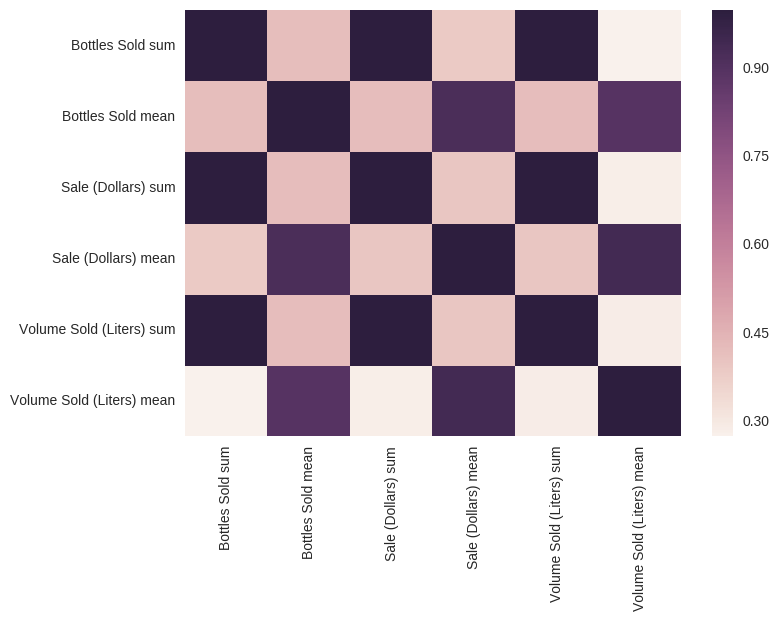

In [14]:
sns.heatmap(sales_county.ix[:,1:].corr())
plt.show()

Without surprise the heatmap shows a high correlation between the different statistcis of similar types, i.e. the sums (of bottles, or sale, or volume) or means.

In [28]:
X = sales_county[sales_county['Quarter']=="2015Q1"]
sales_filter = X["County Number"]
X = X.ix[:,2:]
X.drop("Zip Code <lambda>",axis=1,inplace=True)
X = np.asarray(X)

sales_county_2015 =  sales_county_2015[sales_county_2015["County Number"].isin(sales_filter)]

y = sales_county_2015['Sale (Dollars)']

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [49]:
# ordinary least squares
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.predict(X)
sse = np.mean((np.mean(predictions) - y) ** 2)
var = np.var(predictions)
bias = sse - var - 0.01
print("\nOLS Variance %f 10^9, Bias %f 10^9" % (var/10**9, bias/10**9))

                            OLS Regression Results                            
Dep. Variable:         Sale (Dollars)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.288e+04
Date:                Tue, 01 Nov 2016   Prob (F-statistic):          2.12e-146
Time:                        21:20:18   Log-Likelihood:                -1366.0
No. Observations:                 100   AIC:                             2744.
Df Residuals:                      94   BIC:                             2760.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -9.4462      4.155     -2.274      0.0

Ordinary least squares leads to very good $r^2$ but some of the coefficients don't have statistical significance. We also suspect overfit, so we will apply regularization in order to refine the model.

In [47]:
# Ridge CV
from sklearn import linear_model
rlmcv = linear_model.RidgeCV(normalize=True)
ridge_model = rlmcv.fit(X, y)
print "r^2:", ridge_model.score(X, y)
print "alpha:", rlmcv.alpha_
print "coefficients:", rlmcv.coef_

predictions_ridge = ridge_model.predict(X)
sse = np.mean((np.mean(predictions_ridge) - y) ** 2)
var = np.var(predictions_ridge)
bias = sse - var - 0.01
print("Ridge Variance %f 10^9, Bias %f 10^9" % (var/10**9, bias/10**9))

r^2: 0.995395279244
alpha: 0.1
coefficients: [  1.87683421e+01  -2.64146772e+04   1.51643493e+00   1.08723773e+04
   2.19197286e+01  -6.57154311e+04]
Ridge Variance 50954.220396 10^9, Bias 3606.147840 10^9


In [48]:
# Lasso CV
from sklearn import linear_model
rlmcv = linear_model.LassoCV(normalize=True)
lasso_model = rlmcv.fit(X, y)
print "r^2:", lasso_model.score(X, y)
print "alpha:", rlmcv.alpha_
print "coefficients:", rlmcv.coef_

# Run predictions with Lasso on 2015 data
predictions_lasso = lasso_model.predict(X)
sse = np.mean((np.mean(predictions_lasso) - y) ** 2)
var = np.var(predictions_lasso)
bias = sse - var - 0.01
print("Lasso Variance %f 10^9, Bias %f 10^9" % (var/10**9, bias/10**9))

r^2: 0.998449778224
alpha: 2253.95593897
coefficients: [    0.            -0.             4.52733197  1191.28528486     0.             0.        ]
Lasso Variance 54143.230227 10^9, Bias 417.138009 10^9


### Models analysis
In terms of variance, Ridge and Lasso do approximately as good as standard OLS, however Ridge increases bias by a factor 70, whereas Lasso increases it by only by a factor 8.

Therefore lasso gives us the more confidence. Also it manages to eliminate 4 out of the 6 predictors to retain only 2, the sales sum and the sales mean. 

What it tells us is that the sales for the whole year increase by 4.5 dollars for each additional dollar of sales in Q1, all other parameters held equal. And also, each additional dollar in the mean sales in Q1 results in additional sales of 1191 dollars for the whole year.

In other words, sales in Q1 tend to be smaller than the average over the year, since the end year sales will be more than 4 times higher than Q1 sales.
Also, there is a "bonus" for shops performing higher mean sales in Q1. The higher the mean sales, the more you add on top of your already 4.5 multiplying factor.

In [19]:
# Now move to prediction part
# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20160101")
mask = (df['Date'] >= start_date)
sales_2016 = df[mask]

# Group by store name
sales_2016 = sales_2016.groupby(by=["County Number","Quarter"], as_index=False)
# Compute sums, means
sales_2016 = sales_2016.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Bottles Sold": [np.sum, np.mean],
                   "Zip Code": lambda x: x.iloc[0]}) # just extract once, should be the same

# Collapse the column indices
sales_2016.columns = [''.join(col).strip() for col in sales_county.columns.values]


X_2016 = sales_2016[sales_2016['Quarter']=="2016Q1"]
X_2016 = X_2016.ix[:,2:]
X_2016.drop("Zip Code <lambda>",axis=1,inplace=True)

# Quick check
X_2016.head()

,Bottles Sold sum,Bottles Sold mean,Sale (Dollars) sum,Sale (Dollars) mean,Volume Sold (Liters) sum,Volume Sold (Liters) mean
0,93411,9.537574,1138656.81,116.260650,71673.92,7.318146
1,8454,7.435356,105429.31,92.725866,8275.94,7.278751
2,1727,3.898420,21834.49,49.287788,1643.87,3.710767
3,13687,6.589793,180117.30,86.719933,14929.15,7.187843
4,14585,7.943900,176884.30,96.342211,13725.39,7.475703


In [43]:
# Lasso prediction
predictions_lasso_2016 = lasso_model.predict(X_2016)
sum_2016 = sum(predictions_lasso_2016)/10**6
print("\nSales 2016 predicted using Lasso (M USD)")
print(sum_2016)

# Total 2015 sales
sum_2015 = sum(sales['Sale (Dollars) sum'])/10**6
print("\nActual 2015 Sales (M USD)")
print(sum_2015)

# Anticipated variation
print("\nAnticipated sales variation in 2016 vs 2015 (M USD)")
print(sum_2016-sum_2015)


Sales 2016 predicted using Lasso (M USD)
295.8231979

Actual 2015 Sales (M USD)
284.32857211

Anticipated sales variation in 2016 vs 2015 (M USD)
11.4946257901


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

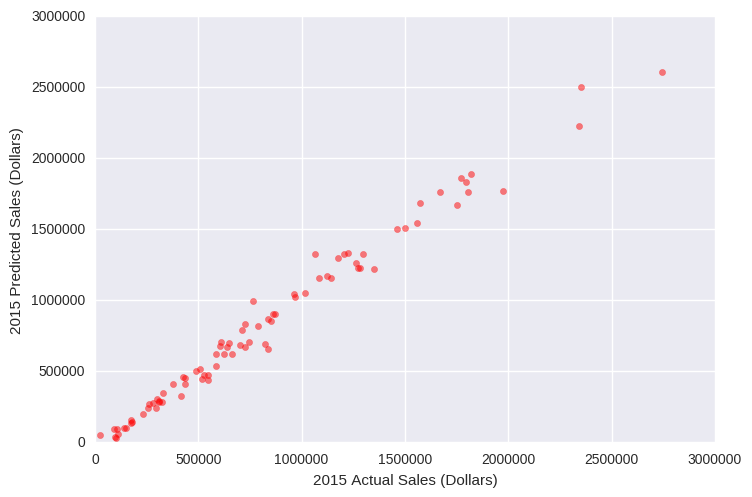

In [26]:
plt.scatter(y,predictions_lasso,color="red",alpha=.5)
plt.xlim(0,3000000)
plt.ylim(0,3000000)
plt.xlabel('2015 Actual Sales (Dollars)')
plt.ylabel('2015 Predicted Sales (Dollars)')
plt.show()


The plot of predicted county sales versus actual values shows a figure relatively close to a straight line. This shows a good model fit. However as the sales increase, so does the uncertainty in the prediction, as the points tend to diverge a little bit more from a straight line than for small sales values.

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Findings
As requested by the Iowa state tax board, we have produced too outputs:
* overview of the sales by store. This has been stored in a separate table ("sales") and will not be discussed in more details here
* a projection of sales in 2016 based on 2015 and Q1 2016. The findings are presented below in the document

### Projected 2016 sales
According to our estimation, the liquor sales is going to increase by 3,9% in 2016 versus 2015, reaching of nearly 296 million dollars.

### Methodology
This estimation is based on a statistical methodology that lead to the conclusion that we can reliably extrapolate Q1 sales to the whole year using the following calculation:
* For a given state, multiply the Q1 sales by a factor 4.5
* to that result add Q1 mean sales multiplied by a factor 1191
More details avaialable on request

### Disclaimer
Although care has been taken to ensure the accuracy of the information provided, no warranty, expressed or implied, is made regarding completeness, reliability or usefulness of any information.

Liquor sales are subject to external unknown factor that by essence cannot be fitted in any statisitcal model 